In [1]:
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import common_functions as cf

In [2]:
weather_path = 'Input/weather_train_set0.csv'
demand_path = 'Input/demand_train_set0.csv'
solar_path = 'Input/pv_train_set0.csv'
data_preprocessed = cf.DataPreprocesser(weather_path, demand_path, solar_path)
data_preprocessed.load_df()
data_preprocessed.remove_nan()
data_preprocessed.interpolate_df()
print(data_preprocessed.df.head())
data_preprocessed.get_columns_of_group_names(['temp'], [1,5,6])

                     demand_MW  irradiance_Wm-2  pv_power_mw  panel_temp_C  \
datetime                                                                     
2017-11-03 00:00:00       2.19              0.0          0.0          7.05   
2017-11-03 00:30:00       2.14              0.0          0.0          7.38   
2017-11-03 01:00:00       2.01              0.0          0.0          7.70   
2017-11-03 01:30:00       1.87              0.0          0.0          7.48   
2017-11-03 02:00:00       1.86              0.0          0.0          7.20   

                     temp_location3  temp_location6  temp_location2  \
datetime                                                              
2017-11-03 00:00:00            7.46           13.20           9.640   
2017-11-03 00:30:00            7.30           13.26           9.675   
2017-11-03 01:00:00            7.14           13.32           9.710   
2017-11-03 01:30:00            7.00           13.34           9.720   
2017-11-03 02:00:00        

/home/raph/project/westernpower/westernpower/task0/common_functions.py:37: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.week


['temp_location1', 'temp_location5', 'temp_location6']

In [3]:
data_preprocessed.set_df(data_preprocessed.df[data_preprocessed.df['week']!=44])
data_preprocessed.df.head()

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-06 00:00:00,2.32,0.0,0.0,1.61,5.14,10.76,6.350,3.58,11.120,7.390,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,1.0
2017-11-06 00:30:00,2.22,0.0,0.0,2.98,5.05,10.70,6.245,3.58,11.060,7.325,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,2.0
2017-11-06 01:00:00,2.04,0.0,0.0,2.76,4.96,10.64,6.140,3.58,11.000,7.260,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,3.0
2017-11-06 01:30:00,1.97,0.0,0.0,3.98,5.03,10.60,6.085,3.57,10.965,7.255,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,4.0
2017-11-06 02:00:00,1.91,0.0,0.0,2.13,5.10,10.56,6.030,3.56,10.930,7.250,0.0,0.0,0.0,0.0,0.0,0.0,45,0,2,5.0


In [5]:
weather_path = 'Input/weather_train_set0.csv'
demand_path = 'Input/demand_train_set0.csv'
solar_path = 'Input/pv_train_set0.csv'
data_preprocessed = cf.DataPreprocesser(weather_path, demand_path, solar_path)
data_preprocessed.load_df()
data_preprocessed.remove_nan()
data_preprocessed.interpolate_df()
battery_power_dispatcher = cf.BatteryPowerDispatcher
battery_power_dispatcher.get_ideal_discharge_dispatch_in_a_week(battery_power_dispatcher, data_preprocessed.df, 10)

/home/raph/project/westernpower/westernpower/task0/common_functions.py:37: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.week


(    1000  1001  1002  1003  1004  1005  1006
 32  0.38  0.00  0.00  0.00  0.45  0.16  0.34
 33  0.57  0.30  0.18  0.20  0.78  0.41  0.67
 34  0.79  0.73  0.69  0.59  1.11  0.70  0.99
 35  1.09  1.09  1.10  1.17  1.36  1.11  1.49
 36  1.36  1.27  1.27  1.32  1.43  1.32  1.57
 37  1.64  1.67  1.57  1.61  1.60  1.51  1.54
 38  1.64  1.81  1.79  1.75  1.59  1.80  1.44
 39  1.50  1.60  1.70  1.63  1.32  1.63  1.29
 40  1.27  1.35  1.46  1.46  1.00  1.33  1.08
 41  0.99  1.16  1.25  1.24  0.78  1.07  0.88
 42  0.73  0.95  0.96  1.02  0.48  0.88  0.60,
   peak_ini peak_target energy solar_energy duration week dow
 1     5.13        3.49   5.98        0.015       11   10   0
 2     4.94        3.13  5.965        18.36       10   10   1
 3     4.93        3.14  5.985       21.525       10   10   2
 4     4.75         3.0  5.995       22.565       10   10   3
 5     5.03        3.43   5.95        1.525       11   10   4
 6      4.6         2.8   5.96       11.785       11   10   5
 7     4.82  

In [13]:
battery_power_dispatcher.get_solar_energy_proportion_by_day_in_a_week(battery_power_dispatcher,data_preprocessed.df, 10)

([0.0025, 1.0, 1.0, 1.0, 0.25416666666666665, 1.0, 1.0],
     1000  1001  1002  1003  1004  1005  1006
 1    2.5   0.0   0.0   0.0   2.5   0.0   0.0
 2    2.5   0.0   0.0   0.0   2.5   0.0   0.0
 3    2.5   0.0   0.0   0.0   2.5   0.0   0.0
 4    2.5   0.0   0.0   0.0  1.45   0.0   0.0
 5   1.97   0.0   0.0   0.0   0.0   0.0   0.0
 6    0.0   0.0   0.0   0.0   0.0   0.0   0.0
 7    0.0   0.0   0.0   0.0   0.0   0.0   0.0
 8    0.0   0.0   0.0   0.0   0.0   0.0   0.0
 9    0.0   0.0   0.0   0.0   0.0   0.0   0.0
 10   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 11   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 12   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 13   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 14   0.0   0.0   0.0  0.01   0.0   0.0  0.01
 15   0.0  0.06  0.07  0.09  0.05  0.04  0.09
 16   0.0  0.52   0.4  0.42  0.09   0.1  0.26
 17   0.0  0.86  0.96   1.0  0.12  0.15  0.24
 18   0.0  1.52  1.55  1.61  0.25  0.12  0.36
 19   0.0  2.12  2.12  2.11  0.24  0.25  0.45
 20   0.0   2.5   2.5  

In [14]:
battery_power_dispatcher.get_end_of_the_day_dispatch(10)

,1000,1001,1002,1003,1004,1005,1006
43,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0


In [16]:
battery_power_dispatcher.get_all_dispatch_in_a_week(battery_power_dispatcher,data_preprocessed.df, 10)

,1000,1001,1002,1003,1004,1005,1006
1,2.5,0.0,0.0,0.0,2.5,0.0,0.0
2,2.5,0.0,0.0,0.0,2.5,0.0,0.0
3,2.5,0.0,0.0,0.0,2.5,0.0,0.0
4,2.5,0.0,0.0,0.0,1.45,0.0,0.0
5,1.97,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'best_model': KNeighborsRegressor(), 'best_scores': 0.8186999476480228, 'best_parameters': {'n_neighbors': 13}}
{'KNeighborsRegressor': {'best_model': KNeighborsRegressor(), 'best_scores': 0.8186999476480228, 'best_parameters': {'n_neighbors': 13}}}
{'best_model': KNeighborsRegressor(), 'best_scores': 0.8186999476480228, 'best_parameters': {'n_neighbors': 13}}


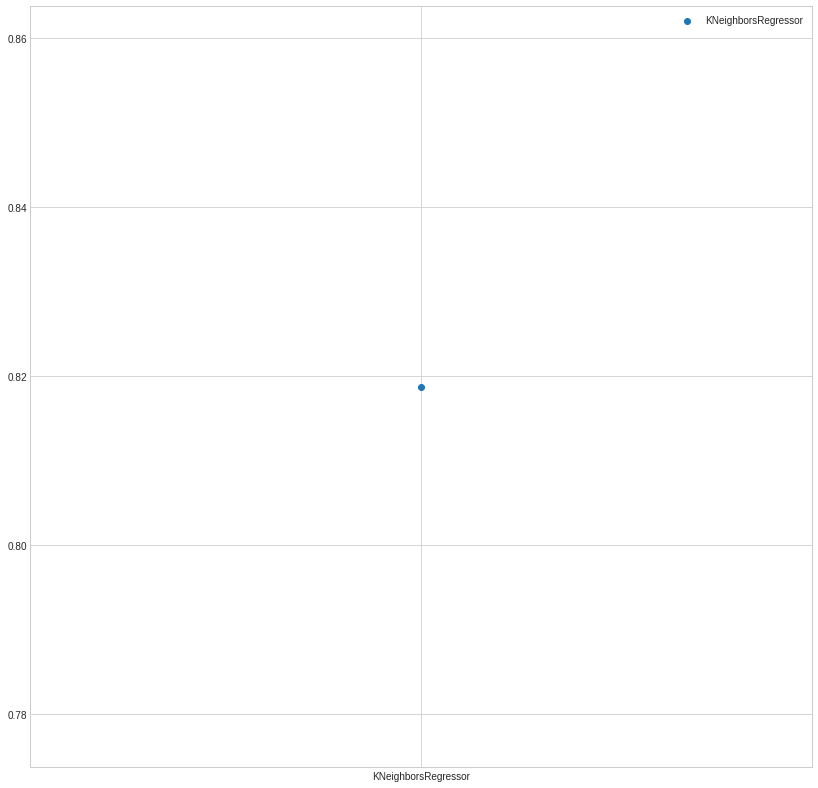

In [18]:
weather_columns = data_preprocessed.get_columns_of_group_names(['temp', 'solar'], [1,2])
weather_columns.append('sp')
X,y = data_preprocessed.build_input_for_ml_algo(weather_columns, ['pv_power_mw'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
ml_researcher = cf.MachineLearningResearcher(X_train,y_train)
ml_researcher.X
print(ml_researcher.get_best_scores_and_params_of_ml_algos('KNeighborsRegressor'))
print(ml_researcher.scores)
print(ml_researcher.get_best_model_with_best_score())
ml_researcher.display_ml_algo_scores()
# models_bests_scores_and_params = {}
# ml_researcher = MachineLearningResearcher
# ml_researcher.param_grids

In [4]:
ml_predictor = cf.MLPredictor(data_preprocessed,30)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
ml_predictor.predict_solar_power_from_weather(RandomForestRegressor(random_state=42, n_estimators = 450))

/home/raph/project/westernpower/westernpower/task0/common_functions.py:234: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  demand_prediction['week']=demand_prediction.index.week


,demand_MW,week,dow,hour,sp,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,pv_power_mw
datetime,,,,,,,,,,,,,,,,,,
2018-07-23 00:00:00,1.73,30.0,0.0,0.0,1.0,15.670,18.500,17.050,17.860,18.740,16.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 00:30:00,1.62,30.0,0.0,0.0,2.0,15.570,18.355,16.845,17.585,18.630,16.620,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:00:00,1.56,30.0,0.0,1.0,3.0,15.470,18.210,16.640,17.310,18.520,16.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:30:00,1.48,30.0,0.0,1.0,4.0,15.370,18.110,16.485,17.050,18.455,16.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 02:00:00,1.48,30.0,0.0,2.0,5.0,15.270,18.010,16.330,16.790,18.390,16.320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-29 21:30:00,2.40,30.0,6.0,21.0,44.0,15.485,17.415,16.370,16.285,17.625,16.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:00:00,2.15,30.0,6.0,22.0,45.0,15.310,17.390,16.300,16.030,17.580,16.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:30:00,1.93,30.0,6.0,22.0,46.0,15.215,17.380,16.255,15.835,17.570,15.980,0.0,0.0,0.0,0.0,0.0,0.0,0.0


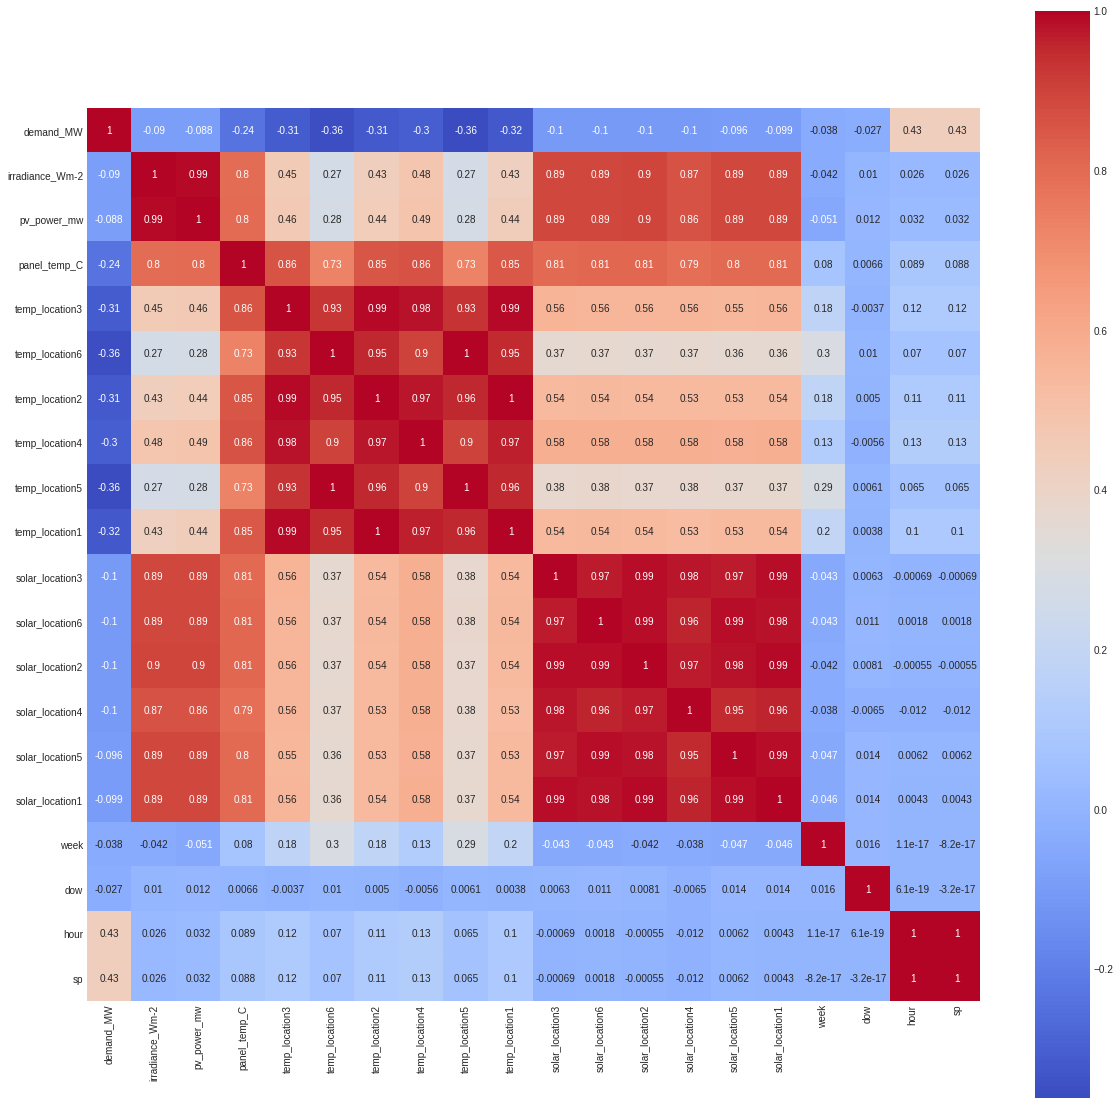

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs

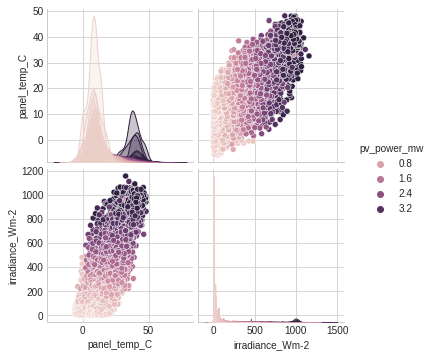

In [19]:
data_vizualisation = cf.DataVisualisation
data_vizualisation.display_correlation_color_map(data_preprocessed.df, data_preprocessed.df.columns.tolist())
data_vizualisation.pair_plot(data_preprocessed.df[data_preprocessed.df['pv_power_mw'] > 0.0], ['panel_temp_C', 'irradiance_Wm-2', 'pv_power_mw'], 'pv_power_mw')